# SETUP

The first part of the code sets up the pca_wavelet network, the training comes later. Most of this code comes from the original authors

In [66]:
import sys
sys.path.append('../segmentation_helper')

import tensorflow as tf
import keras
import tqdm
import matplotlib.pyplot as plt
import numpy as np
import data_loader as dl
import model_broker as mb
import os
import tensorflow_datasets as tfds

In [67]:
tf.keras.backend.set_floatx("float64")

In [69]:
dataset = "birds"
test_size=300
loader = dl.DataLoader(IMAGE_SIZE=128,dataset=dataset)
img_ds = loader.import_processed_img()
seg_ds = loader.import_processed_seg()
cardinality = int(img_ds.cardinality())

img_test = img_ds.take(test_size)
seg_test = seg_ds.take(test_size)
img_train = img_ds.skip(test_size)
seg_train = seg_ds.skip(test_size)    

In [33]:
def scaledtanh(x): 
    return tf.math.tanh(x*0.1)

def scaledatanh(x):
    return tf.math.atanh(x)*10

In [34]:
image=next(iter(img_train))[0]

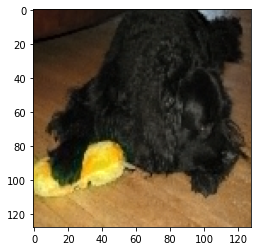

In [35]:
plt.imshow(imginvhead(imghead(image))[0])

In [55]:
model_name = "img"
img_broker = mb.ModelBroker(trainset=img_train,
                            testset=img_test,
                            dirname=dataset+"_"+model_name,
                            keep_percent=1.0,
                            count=5,
                            sample_size=100)
imghead,imginvhead = img_broker.build_model()
#imghead,imginvhead = img_broker.load_model()                                      
img_broker.check_build(imghead,imginvhead,img_test)

keep_percent 0.24992947786237735
meanimg.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
Starting level 0


KeyboardInterrupt: 

keep_percent 0.4444444444444444
meanimg.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
Starting level 0
Completing 64.0
pca shape tf.Tensor([27 27], shape=(2,), dtype=int32)
keep_channels 12 keep_max 12.0
keep_channels 12
ufilts.shape (1, 1, 1, 27, 12)
end loop 64.0
Starting level 1
Completing 32.0
pca shape tf.Tensor([108 108], shape=(2,), dtype=int32)
keep_channels 48 keep_max 192.0
keep_channels 48
ufilts.shape (1, 1, 1, 108, 48)
end loop 32.0
Starting level 2
Completing 16.0
pca shape tf.Tensor([432 432], shape=(2,), dtype=int32)
keep_channels 192 keep_max 3072.0
keep_channels 192
ufilts.shape (1, 1, 1, 432, 192)
end loop 16.0
Starting level 3
Completing 8.0
pca shape tf.Tensor([1728 1728], shape=(2,), dtype=int32)
keep_channels 768 keep_max 49152.0
keep_channels 768
ufilts.shape (1, 1, 1, 1728, 768)
end loop 8.0
saving to: models/pets_seg
out.shape (1, 8, 8, 768)
keep_percent 0.4444444444444444
meanimg.dtype <dtype: 'float64'>
self.m

array([[[0.03921569, 0.03921569, 0.03921569],
        [0.03921569, 0.03921569, 0.03921569],
        [0.29069957, 0.29854271, 0.24642873],
        ...,
        [0.05222431, 0.07575373, 0.0424703 ],
        [0.44322753, 0.46675694, 0.41969806],
        [0.14468086, 0.18567348, 0.1367074 ]],

       [[0.03921569, 0.03921569, 0.03921569],
        [0.03998964, 0.03998964, 0.03998964],
        [0.25621819, 0.26406133, 0.21194734],
        ...,
        [0.12191162, 0.14544104, 0.10361173],
        [0.59554565, 0.61907506, 0.57201624],
        [0.16913429, 0.21012694, 0.15724704]],

       [[0.03921569, 0.03921569, 0.03921569],
        [0.06647926, 0.06647926, 0.06647926],
        [0.39394087, 0.401784  , 0.34967005],
        ...,
        [0.13528323, 0.15881264, 0.11175382],
        [0.33815837, 0.36168778, 0.31462896],
        [0.0820376 , 0.12303025, 0.07411942]],

       ...,

       [[0.55786985, 0.53041887, 0.50688946],
        [0.53438449, 0.50693351, 0.48340407],
        [0.51495409, 0

sample.shape (128, 128, 3)
pred.shape (1, 8, 8, 768)
recon.shape (128, 128, 3)
sample.dtype <dtype: 'float64'>
recon[0].dtype <dtype: 'float64'>
np.prod(sample.shape) 49152
psnr =  28.97317151957635
ncc =  [[1.         0.98956413]
 [0.98956413 1.        ]]
sample[30:34,30:34,0] tf.Tensor(
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]], shape=(4, 4), dtype=float64)
recon[30:34,30:34,0] tf.Tensor(
[[-0.00121893  0.01042749  0.00260403  0.00908689]
 [ 0.0012171  -0.01022011 -0.00264207 -0.00787276]
 [ 0.00447623  0.01248736 -0.00186103  0.00970265]
 [-0.00265347 -0.00999276  0.00020424 -0.00591474]], shape=(4, 4), dtype=float64)


(28.97317151957635,
 array([[1.        , 0.98956413],
        [0.98956413, 1.        ]]))

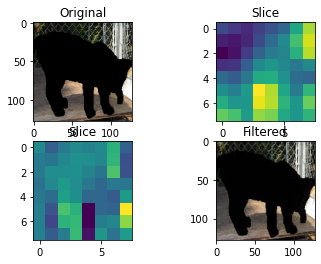

In [37]:
model_name = "seg"
seg_broker = mb.ModelBroker(trainset=seg_train,
                            testset=seg_test,
                            dirname=dataset+"_"+model_name,
                            keep_percent=1.0,
                            count=4,
                            sample_size=100)
                            #activity_regularizer = scaledtanh,
                            #inverse_activity_regularizer=scaledatanh,
                            #activation_before=True)
seghead,seginvhead = seg_broker.build_model()                                        
#seghead,seginvhead = seg_broker.load_model()

array([[[0.29741284, 0.30055314, 0.13897227],
        [0.26915333, 0.28185245, 0.1051114 ],
        [0.27031252, 0.28986746, 0.13748468],
        ...,
        [0.06666667, 0.08235294, 0.03921569],
        [0.07310049, 0.08878677, 0.03921569],
        [0.07800413, 0.08584727, 0.03921569]],

       [[0.32166559, 0.32955968, 0.11755012],
        [0.28722379, 0.29623139, 0.09362698],
        [0.26362807, 0.27655149, 0.09469425],
        ...,
        [0.06639094, 0.08681066, 0.03921569],
        [0.07394278, 0.08962905, 0.03921569],
        [0.07293199, 0.08393076, 0.03921569]],

       [[0.31588542, 0.31766382, 0.07374675],
        [0.30694488, 0.30584073, 0.08228186],
        [0.25469565, 0.26642567, 0.05072093],
        ...,
        [0.0617075 , 0.08915848, 0.03921569],
        [0.07058273, 0.08626901, 0.03921569],
        [0.06840605, 0.08413828, 0.03921569]],

       ...,

       [[0.29586399, 0.24525817, 0.0980294 ],
        [0.30980945, 0.25490749, 0.10700181],
        [0.31265727, 0

array([[[0.29741284, 0.30055314, 0.13897227],
        [0.26915333, 0.28185245, 0.1051114 ],
        [0.27031252, 0.28986746, 0.13748468],
        ...,
        [0.06666667, 0.08235294, 0.03921569],
        [0.07310049, 0.08878677, 0.03921569],
        [0.07800413, 0.08584727, 0.03921569]],

       [[0.32166559, 0.32955968, 0.11755012],
        [0.28722379, 0.29623139, 0.09362698],
        [0.26362807, 0.27655149, 0.09469425],
        ...,
        [0.06639094, 0.08681066, 0.03921569],
        [0.07394278, 0.08962905, 0.03921569],
        [0.07293199, 0.08393076, 0.03921569]],

       [[0.31588542, 0.31766382, 0.07374675],
        [0.30694488, 0.30584073, 0.08228186],
        [0.25469565, 0.26642567, 0.05072093],
        ...,
        [0.0617075 , 0.08915848, 0.03921569],
        [0.07058273, 0.08626901, 0.03921569],
        [0.06840605, 0.08413828, 0.03921569]],

       ...,

       [[0.29586399, 0.24525817, 0.0980294 ],
        [0.30980945, 0.25490749, 0.10700181],
        [0.31265727, 0

sample.shape (128, 128, 3)
pred.shape (1, 8, 8, 768)
recon.shape (128, 128, 3)
sample.dtype <dtype: 'float64'>
recon[0].dtype <dtype: 'float64'>
np.prod(sample.shape) 49152
psnr =  33.82213585947581
ncc =  [[1.       0.987109]
 [0.987109 1.      ]]
sample[30:34,30:34,0] tf.Tensor(
[[0.18682599 0.17372856 0.16443518 0.13984351]
 [0.20392157 0.18554257 0.16291361 0.14260614]
 [0.20663297 0.17657951 0.16078432 0.14376031]
 [0.20223677 0.18902683 0.16494572 0.14509805]], shape=(4, 4), dtype=float64)
recon[30:34,30:34,0] tf.Tensor(
[[0.1956527  0.19038677 0.15517588 0.1426083 ]
 [0.20252918 0.17150214 0.15730113 0.12912032]
 [0.20470818 0.19816192 0.16437117 0.14561119]
 [0.19911467 0.17386757 0.16480253 0.13070152]], shape=(4, 4), dtype=float64)


(33.82213585947581,
 array([[1.      , 0.987109],
        [0.987109, 1.      ]]))

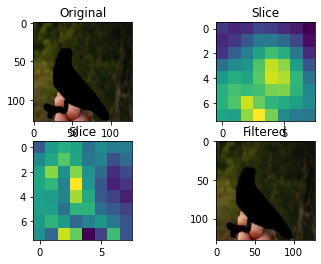

In [74]:

seg_broker.check_build(seghead,seginvhead,seg_test.take(1))

array([[[0.29741284, 0.30055314, 0.13897227],
        [0.26915333, 0.28185245, 0.1051114 ],
        [0.27031252, 0.28986746, 0.13748468],
        ...,
        [0.06666667, 0.08235294, 0.02352941],
        [0.07310049, 0.08878677, 0.02996324],
        [0.07800413, 0.08584727, 0.0309453 ]],

       [[0.32166559, 0.32955968, 0.11755012],
        [0.28722379, 0.29623139, 0.09362698],
        [0.26362807, 0.27655149, 0.09469425],
        ...,
        [0.06639094, 0.08681066, 0.02640931],
        [0.07394278, 0.08962905, 0.03080552],
        [0.07293199, 0.08393076, 0.02745098]],

       [[0.31588542, 0.31766382, 0.07374675],
        [0.30694488, 0.30584073, 0.08228186],
        [0.25469565, 0.26642567, 0.05072093],
        ...,
        [0.0617075 , 0.08915848, 0.02641338],
        [0.07058273, 0.08626901, 0.02744547],
        [0.06840605, 0.08413828, 0.02529943]],

       ...,

       [[0.29586399, 0.24525817, 0.0980294 ],
        [0.30980945, 0.25490749, 0.10700181],
        [0.31265727, 0

array([[[0.29741284, 0.30055314, 0.13897227],
        [0.26915333, 0.28185245, 0.1051114 ],
        [0.27031252, 0.28986746, 0.13748468],
        ...,
        [0.06666667, 0.08235294, 0.02352941],
        [0.07310049, 0.08878677, 0.02996324],
        [0.07800413, 0.08584727, 0.0309453 ]],

       [[0.32166559, 0.32955968, 0.11755012],
        [0.28722379, 0.29623139, 0.09362698],
        [0.26362807, 0.27655149, 0.09469425],
        ...,
        [0.06639094, 0.08681066, 0.02640931],
        [0.07394278, 0.08962905, 0.03080552],
        [0.07293199, 0.08393076, 0.02745098]],

       [[0.31588542, 0.31766382, 0.07374675],
        [0.30694488, 0.30584073, 0.08228186],
        [0.25469565, 0.26642567, 0.05072093],
        ...,
        [0.0617075 , 0.08915848, 0.02641338],
        [0.07058273, 0.08626901, 0.02744547],
        [0.06840605, 0.08413828, 0.02529943]],

       ...,

       [[0.29586399, 0.24525817, 0.0980294 ],
        [0.30980945, 0.25490749, 0.10700181],
        [0.31265727, 0

sample.shape (128, 128, 3)
pred.shape (1, 8, 8, 768)
recon.shape (128, 128, 3)
sample.dtype <dtype: 'float64'>
recon[0].dtype <dtype: 'float64'>
np.prod(sample.shape) 49152
psnr =  33.56504483258509
ncc =  [[1.         0.99202659]
 [0.99202659 1.        ]]
sample[30:34,30:34,0] tf.Tensor(
[[0.18682599 0.17372856 0.16443518 0.13984351]
 [0.20392157 0.18554257 0.16291361 0.14260614]
 [0.20663297 0.17657951 0.16078432 0.14376031]
 [0.20223677 0.18902683 0.16494572 0.14509805]], shape=(4, 4), dtype=float64)
recon[30:34,30:34,0] tf.Tensor(
[[0.19090378 0.18114253 0.14937438 0.12881849]
 [0.19946497 0.17888848 0.15652782 0.13155093]
 [0.20009408 0.17732428 0.15609757 0.14168661]
 [0.19316112 0.18841121 0.16110078 0.14348597]], shape=(4, 4), dtype=float64)


(33.56504483258509,
 array([[1.        , 0.99202659],
        [0.99202659, 1.        ]]))

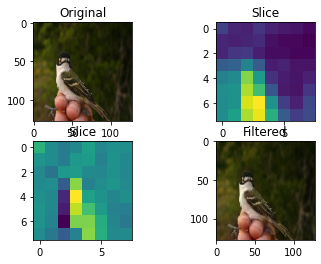

In [73]:
img_broker.check_build(imghead,imginvhead,img_test.take(1))

# Training

This is the loop used to find the variables to find A and b in y=Ax+b

In [38]:
shape = imghead(next(iter(img_train))[0]).shape

In [39]:
shape

TensorShape([1, 8, 8, 768])

In [40]:
shape_0 = shape[3]
shape_1 = shape[1]*shape[2]
shape_2 = shape[1]

In [41]:
reconstruct = next(iter(seg_train))[0].shape

In [42]:
n = 0.0


xxt = np.zeros([shape_0,shape_0])
yxt = np.zeros([shape_0,shape_0])
x = np.ones([shape_1])
x_m = np.zeros([shape_0])
y = np.ones([shape_1]) 
y_m = np.zeros([shape_0])

bar = tqdm.notebook.tqdm(total = int(seg_train.cardinality()))

for item in iter(zip(img_train,seg_train)):
    bar.update(1)
    image = item[0][0]
    segmentation = item[1][0]
    
    imgdecom = imghead(image)
    segdecom = seghead(segmentation)
    
    mat = tf.reshape(imgdecom,[-1,imgdecom.shape[-1]])
    segmat = tf.reshape(segdecom,[-1,imgdecom.shape[-1]])
    
    cov = tf.tensordot(mat,mat,[0,0])
    xxt += cov
    #del cov
    
    segcov = tf.tensordot(mat,segmat,[0,0])
    yxt += segcov
    #del segcov
    
    x_m += tf.linalg.matvec(mat,x,transpose_a=True)
    y_m += tf.linalg.matvec(segmat,y,transpose_a=True)
    
    n += 1

  0%|          | 0/5700 [00:00<?, ?it/s]

## Calculating A and B

This section uses the values found in the training loop to calculate values for A and B

In [43]:
xxt = xxt - tf.matmul([x_m],[x_m],transpose_a=True)/n
yxt = yxt - tf.matmul([x_m],[y_m],transpose_a=True)/n

In [44]:
inverse_xxt = tf.linalg.pinv(xxt)

In [45]:
A = tf.matmul(inverse_xxt,yxt)

In [46]:
b = (y_m - tf.linalg.matvec(A,x_m,transpose_a=True))/n

In [47]:
A_filter = tf.reshape(A,(1,1,shape_0,shape_0)) 

In [48]:
def iou_coef(y_true, y_pred,smooth=1):
  intersection = tf.reduce_sum(y_true * y_pred, 0)
  union = tf.reduce_sum(y_true,0)+tf.reduce_sum(y_pred,0)-intersection
  iou = tf.reduce_mean((intersection+1) / (union+1), 0)
  return float(iou)

In [49]:
def dice_coef(y_true, y_pred,smooth=1):
    y_true_f = tf.reshape(y_true,-1)
    y_pred_f =tf.reshape(y_pred,-1)
    intersection = tf.reduce_sum(y_true_f * y_pred_f,0)

    return float((2. * intersection+smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f)+smooth))

0.7324350336862367
0.5337322198780934


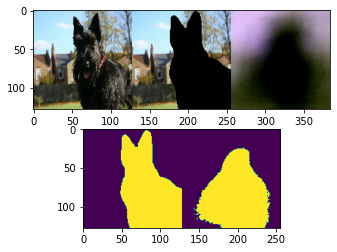

In [54]:
threshold_intensity = 0.1
skip = np.random.randint(0,70)
image,seg_base = next(iter(zip(img_train.skip(skip),seg_train.skip(skip))))
imgdecom = imghead(image[0])

conv = tf.nn.conv2d(imgdecom, A_filter,1,"VALID")
conv = tf.nn.bias_add(conv,b)
seg = seginvhead(conv)

y_true = tf.cast(tf.reduce_mean(seg_base[0],2)==0,tf.float64)
y_pred = tf.cast(tf.reduce_mean(seg[0],2)<threshold_intensity,tf.float64)

print(dice_coef(y_true,y_pred))
print(iou_coef(y_true,y_pred))
plt.subplot(2,1,1)
plt.imshow(np.hstack([image[0],seg_base[0],seg[0]]))
plt.subplot(2,1,2)
plt.imshow(np.hstack([y_true,y_pred]))